In [1]:
!pip list

Package                       Version
----------------------------- --------------
absl-py                       1.0.0
alabaster                     0.7.12
albumentations                0.1.12
altair                        4.2.0
appdirs                       1.4.4
argon2-cffi                   21.3.0
argon2-cffi-bindings          21.2.0
arviz                         0.11.4
astor                         0.8.1
astropy                       4.3.1
astunparse                    1.6.3
atari-py                      0.2.9
atomicwrites                  1.4.0
attrs                         21.4.0
audioread                     2.1.9
autograd                      1.3
Babel                         2.9.1
backcall                      0.2.0
beautifulsoup4                4.6.3
bleach                        4.1.0
blis                          0.4.1
bokeh                         2.3.3
Bottleneck                    1.3.2
branca                        0.4.2
bs4                           0.0.1
CacheControl 

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
import os, sys
from google.colab import drive
# This mouunts your google drive to the current runtime
drive.mount('/content/mnt')
# We define a notebook path
nb_path = '/content/notebooks'
# We create a symbolic link from our drive's default "Colab Notebooks" folder to nb_path
os.symlink('/content/mnt/My Drive/Colab Notebooks', nb_path)
# Insert nb path
sys.path.insert(0, nb_path)

Mounted at /content/mnt


In [4]:
!ls /content/mnt/MyDrive/Colab\ Notebooks

01IntroDataPreparation-1.ipynb	energydata_complete.csv  Test1NJ.ipynb
01IntroDataPreparation.ipynb	lung.PNG		 Untitled0.ipynb
airfoil_self_noise.dat		sample_weather.txt
Elephant-1.png			sudoku-original.png


In [5]:
# Example of installing external pip package
! pip install trimesh

     |████████████████████████████████| 640 kB 5.2 MB/s 


(423, 419)


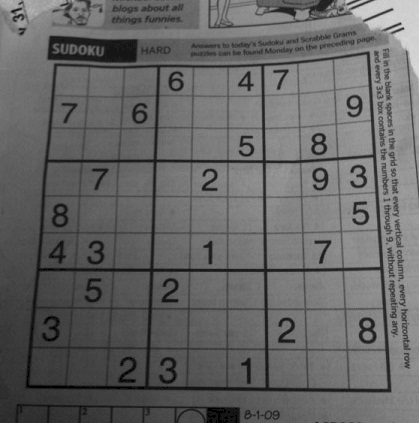

In [6]:
import cv2
from google.colab.patches import cv2_imshow
# last argument 1 is for rgb, 0 is for grayscale
img = cv2.imread('/content/notebooks/sudoku-original.png',0)
print(img.shape)
cv2_imshow(img)

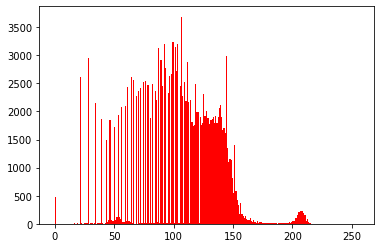

In [7]:
import numpy as np
import matplotlib.pyplot as plt
# arguments are (img, bins, range)
_ = plt.hist(img.flatten(),256,[0,256], color = 'r')

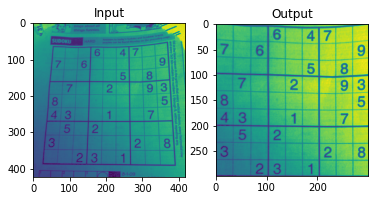

In [8]:
img = cv2.imread('/content/notebooks/sudoku-original.png',0)
rows,cols = img.shape
pts1 = np.float32([[56,65],[368,52],[28,387],[389,390]])
pts2 = np.float32([[0,0],[300,0],[0,300],[300,300]])

M = cv2.getPerspectiveTransform(pts1,pts2)

dst = cv2.warpPerspective(img,M,(300,300))

plt.subplot(121),plt.imshow(img),plt.title('Input')
plt.subplot(122),plt.imshow(dst),plt.title('Output')
plt.show()

In [9]:
import pandas as pd
Energydata = pd.read_csv('/content/notebooks/energydata_complete.csv')
Energydata

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,T5,RH_5,T6,RH_6,T7,RH_7,T8,RH_8,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,Energy Consumption
0,1/11/2016 17:00,60,30,19.890000,47.596667,19.200000,44.790000,19.790000,44.730000,19.000000,45.566667,17.166667,55.200000,7.026667,84.256667,17.200000,41.626667,18.2000,48.900000,17.033333,45.5300,6.60,733.5,92.000000,7.000000,63.000000,5.3,13.275433
1,1/11/2016 17:10,60,30,19.890000,46.693333,19.200000,44.722500,19.790000,44.790000,19.000000,45.992500,17.166667,55.200000,6.833333,84.063333,17.200000,41.560000,18.2000,48.863333,17.066667,45.5600,6.48,733.6,92.000000,6.666667,59.166667,5.2,18.606195
2,1/11/2016 17:20,50,30,19.890000,46.300000,19.200000,44.626667,19.790000,44.933333,18.926667,45.890000,17.166667,55.090000,6.560000,83.156667,17.200000,41.433333,18.2000,48.730000,17.000000,45.5000,6.37,733.7,92.000000,6.333333,55.333333,5.1,28.642668
3,1/11/2016 17:30,50,40,19.890000,46.066667,19.200000,44.590000,19.790000,45.000000,18.890000,45.723333,17.166667,55.090000,6.433333,83.423333,17.133333,41.290000,18.1000,48.590000,17.000000,45.4000,6.25,733.8,92.000000,6.000000,51.500000,5.0,45.410390
4,1/11/2016 17:40,60,40,19.890000,46.333333,19.200000,44.530000,19.790000,45.000000,18.890000,45.530000,17.200000,55.090000,6.366667,84.893333,17.200000,41.230000,18.1000,48.590000,17.000000,45.4000,6.13,733.9,92.000000,5.666667,47.666667,4.9,10.084097
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19730,5/27/2016 17:20,100,0,25.566667,46.560000,25.890000,42.025714,27.200000,41.163333,24.700000,45.590000,23.200000,52.400000,24.796667,1.000000,24.500000,44.500000,24.7000,50.074000,23.200000,46.7900,22.70,755.2,55.666667,3.333333,23.666667,13.3,43.096812
19731,5/27/2016 17:30,90,0,25.500000,46.500000,25.754000,42.080000,27.133333,41.223333,24.700000,45.590000,23.230000,52.326667,24.196667,1.000000,24.557143,44.414286,24.7000,49.790000,23.200000,46.7900,22.60,755.2,56.000000,3.500000,24.500000,13.3,49.282940
19732,5/27/2016 17:40,270,10,25.500000,46.596667,25.628571,42.768571,27.050000,41.690000,24.700000,45.730000,23.230000,52.266667,23.626667,1.000000,24.540000,44.400000,24.7000,49.660000,23.200000,46.7900,22.50,755.2,56.333333,3.666667,25.333333,13.3,29.199117
19733,5/27/2016 17:50,420,10,25.500000,46.990000,25.414000,43.036000,26.890000,41.290000,24.700000,45.790000,23.200000,52.200000,22.433333,1.000000,24.500000,44.295714,24.6625,49.518750,23.200000,46.8175,22.30,755.2,56.666667,3.833333,26.166667,13.2,6.322784


In [10]:
Energydata_np = Energydata.to_numpy()
print(Energydata_np.shape)

(19735, 28)


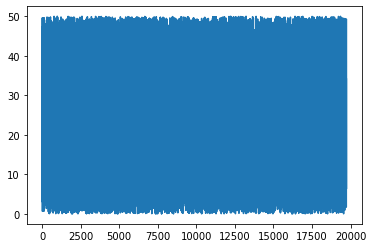

In [11]:
plt.figure
plt.plot(Energydata_np[:,27])
plt.show()

[26.896010739999998 34.49534894666667 20.982825560166663
 18.382617974166667 32.144879765 25.979723388333337 31.985741885666666
 14.735333670833334 26.93007875716667 22.93167891666667 23.808168935500003
 32.19995678666667 21.672834143499998 24.360382201666667
 14.805576117000001 30.832067013333333 24.430549404333334
 32.573538909999996 28.193047934000003 33.66853763033333 25.0219153465
 21.1486345895 18.145264028333333 31.225355893 33.529781535000005
 22.459578969833334 17.121774222499997 27.74939925833333
 23.500967164333336 21.587226891666663 28.024552105833333
 24.124418261666673 22.934665407 12.602144891333333 18.144288947166668
 16.625564323166664 9.897126347666665 22.625257170166662 22.520096908
 23.541650472 22.149446842666666 25.0669086635 40.040707875 29.34524523
 21.6043543975 25.315366807333337 19.046644423666667 28.3074273905
 24.291957002166665 28.00405913983333 23.334059888333332
 23.856823584500003 31.134974349999997 23.333625858833333
 16.451379879666668 36.3630167325 2

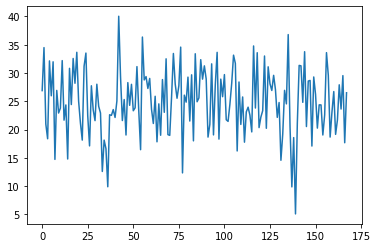

In [12]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns; 
#Collect the first week's data, from 00:10 to 24:00
Energy = np.array([Energydata_np[70:1078,27]])
#print(Energy)
# here we took 6 as our input
n = 6
avgResult = np.average(Energy.reshape(-1, n), axis=1)
print(avgResult)
plt.plot(avgResult)
plt.show()

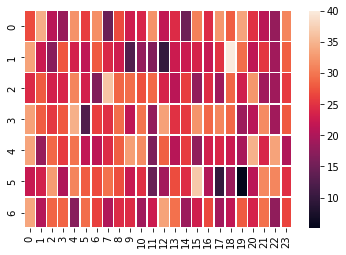

In [13]:
#reshape the form to using seaborn
Energy_Avg = avgResult.reshape(7, 24)
Energy_Avg = Energy_Avg.astype(float)
# print(Energy)
img = sns.heatmap(Energy_Avg,linewidths=.5)

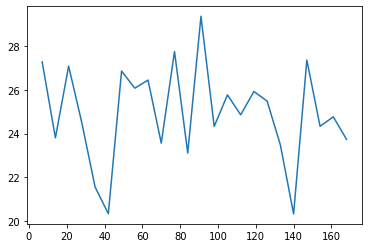

In [14]:
#Generate NSM every 7 hours
NSM = np.arange(7,7*25,7)
NSM.shape
# Average dataset every 7 hours, 
Energy_HRAvg = np.average(avgResult.reshape(-1, 7), axis=1)
plt.plot(NSM, Energy_HRAvg)
plt.show()

(array([0.00170343, 0.00340686, 0.00851714, 0.03577201, 0.04769601,
        0.06984059, 0.05962001, 0.03406858, 0.02214458, 0.00340686]),
 array([5.097184095833334, 8.59153647375, 12.085888851666667,
        15.580241229583336, 19.074593607500002, 22.56894598541667,
        26.063298363333338, 29.557650741250004, 33.05200311916667,
        36.54635549708333, 40.040707875], dtype=object),
 <a list of 10 Patch objects>)

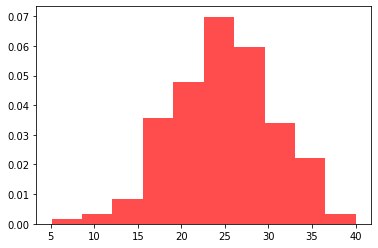

In [15]:
# arguments are (img, bins, range)
plt.hist(avgResult, density = 1, color ='red', alpha = 0.7)


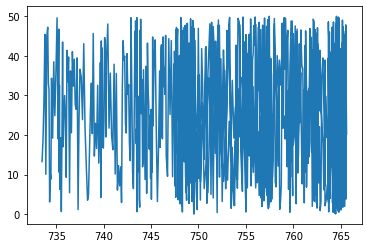

In [16]:
plt.plot(Energydata_np[0:1008,22],Energydata_np[0:1008,27])

In [17]:
# Cosumption only has relationship with Hg_hight

In [23]:
Airfoil_Data = np.loadtxt('/content/notebooks/airfoil_self_noise.dat', unpack = True)
print(Airfoil_Data)
Airfoil_Data.shape

[[8.00000e+02 1.00000e+03 1.25000e+03 ... 4.00000e+03 5.00000e+03
  6.30000e+03]
 [0.00000e+00 0.00000e+00 0.00000e+00 ... 1.56000e+01 1.56000e+01
  1.56000e+01]
 [3.04800e-01 3.04800e-01 3.04800e-01 ... 1.01600e-01 1.01600e-01
  1.01600e-01]
 [7.13000e+01 7.13000e+01 7.13000e+01 ... 3.96000e+01 3.96000e+01
  3.96000e+01]
 [2.66337e-03 2.66337e-03 2.66337e-03 ... 5.28487e-02 5.28487e-02
  5.28487e-02]
 [1.26201e+02 1.25201e+02 1.25951e+02 ... 1.06604e+02 1.06224e+02
  1.04204e+02]]


(6, 1503)

In [63]:
from scipy.stats import kurtosis
from scipy.stats import skew
Airfoil_Mean = Airfoil_Data.mean(axis=1)
Airfoil_Std = Airfoil_Data.std(axis=1)
Airfoil_Median = np.median(Airfoil_Data,axis=1)
Airfoil_Kur = kurtosis(Airfoil_Data,axis=1)
Airfoil_Skew = skew(Airfoil_Data,axis=1)
Airfoil_min = np.amin(Airfoil_Data,axis=1)
Airfoil_max = np.amax(Airfoil_Data,axis=1)
#Airfoil_max
Airfoil_df = pd.DataFrame({'Type':['Frequency', 'Angle of attack', 'Chord length', 'Free-stream velocity','Suction side displacement thickness','Scaled sound pressure level'],
                   'Mean':Airfoil_Mean,
                   'Standard Deviation':Airfoil_Std,
                   'Median':Airfoil_Median,
                   'Kurtosis':Airfoil_Kur,
                   'Skew':Airfoil_Skew,
                   'Range_min':Airfoil_min,
                   'Range_max':Airfoil_max})
print(Airfoil_df)

                                  Type         Mean  ...   Range_min     Range_max
0                            Frequency  2886.380572  ...  200.000000  20000.000000
1                      Angle of attack     6.782302  ...    0.000000     22.200000
2                         Chord length     0.136548  ...    0.025400      0.304800
3                 Free-stream velocity    50.860745  ...   31.700000     71.300000
4  Suction side displacement thickness     0.011140  ...    0.000401      0.058411
5          Scaled sound pressure level   124.835943  ...  103.380000    140.987000

[6 rows x 8 columns]
